In [1]:
import os, json, sys
import torch, torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools import mask

from tqdm import tqdm

from PIL import Image, ImageDraw, ImageFont

In [10]:
%matplotlib inline

In [2]:
# load the annotations
with open('../gzgc.coco/annotations/instances_train2020.json') as f:
  data_train = json.load(f)
f.close()

# initialize COCO api for instance annotations
annFile='../gzgc.coco/annotations/instances_train2020.json'
coco_train=COCO(annFile)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


conda create -n myenv python=2.9 pycocotools opencv

https://github.com/keras-team/keras/issues/9498

In [2]:
os.getcwd()

'C:\\Users\\kmei\\Documents\\Caltech\\CNS148_Computational_Vision\\animal-reidentification\\kevin'

In [38]:
# load the annotations
with open('../gzgc.coco/annotations/customSplit_test.json') as f:
  data_train_new = json.load(f)
f.close()

In [39]:
len(data_train_new['annotations'])

1279

In [16]:
data_train_new.keys()

dict_keys(['categories', 'images', 'annotations'])

In [3]:
len(data_train['images'])

4948

In [39]:
len(data_train['annotations']) #6925 annotations!

6925

In [3]:
zebra_annotations = [ann for ann in data_train['annotations'] if ann['category_id'] == 1]
zebra_names = [ann['name'] for ann in zebra_annotations]
unique_zebra_names, zebra_names_counts = np.unique(zebra_names, return_counts=True)
unique_zebra_names, zebra_names_counts = unique_zebra_names.tolist(), zebra_names_counts.tolist()

In [10]:
len(zebra_annotations)

6286

In [16]:
giraffe_annotations = [ann for ann in data_train['annotations'] if ann['category_id'] == 0]
print(len(np.unique([ann['image_id'] for ann in giraffe_annotations])))
set(np.unique([ann['image_id'] for ann in giraffe_annotations])).intersection(set(np.unique([ann['image_id'] for ann in zebra_annotations])))

550


{520, 521, 561, 563, 3470, 3599, 4713}

In [9]:
# number of images with zebras
len(np.unique([ann['image_id'] for ann in zebra_annotations]))

4405

In [4]:
# unique_zebra_names

In [ ]:
data_train.keys() ## Look at the different keys of the data_train json COCO annotations

In [5]:
data_train.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations', 'parts'])

In [23]:
print(data_train['info'])
print(data_train['licenses'])
print(data_train['parts'])
print(data_train['categories'])

{'description': 'Wild Me GZGC-IBEIS Dataset', 'url': 'http://www.wildme.org', 'version': '1.0', 'year': 2020, 'contributor': 'Wild Me <dev@wildme.org>', 'date_created': '2020-07-30 21:18:59.960013', 'name': 'GZGC-IBEIS', 'uuid': 'c03cd79d-441c-4400-bee7-38849e56fe0d'}
[{'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}]
[]
[{'id': 0, 'name': 'giraffe_masai', 'supercategory': 'animal'}, {'id': 1, 'name': 'zebra_plains', 'supercategory': 'animal'}]


In [20]:
data_train['images'][0]

{'license': 3,
 'file_name': '000000000001.jpg',
 'photographer': "NNP GZC Car '10WHITE', Person 'A', Image 0005",
 'coco_url': None,
 'height': 2000,
 'width': 3000,
 'date_captured': '2015-03-01 14:53:46',
 'gps_lat_captured': '-1.351341',
 'gps_lon_captured': '36.800374',
 'flickr_url': None,
 'id': 1,
 'uuid': '826fb775-2f99-a8cf-7120-cba60562e82f'}

The annotation ID refers to the annotation. The image_id corresponds to the id in the images dictionary.

In [17]:
data_train['annotations'][0:1]

[{'bbox': [895.5, 437.0, 1221.0, 690.0],
  'theta': 0.0,
  'viewpoint': 'left',
  'segmentation': [[896, 437, 2116, 437, 2116, 1127, 896, 1127, 896, 437]],
  'segmentation_bbox': [896, 437, 1220, 690],
  'area': 841800,
  'iscrowd': 0,
  'id': 1,
  'image_id': 1,
  'category_id': 1,
  'uuid': '7cfac6bc-379a-4859-a5c8-b21b06d2fe3d',
  'individual_ids': [2, 1, 3, 3459],
  'isinterest': 0,
  'name': 'IBEIS_PZ_1561',
  'review_ids': []}]

In [25]:
len(data_train['images'])

4948

In [44]:
len(data_train['categories'])

2

In [11]:
data_train['annotations'][277]

{'bbox': [1260.0, 1041.0, 231.0, 210.0],
 'theta': 0.0,
 'viewpoint': 'right',
 'segmentation': [[1260,
   1041,
   1491,
   1041,
   1491,
   1251,
   1260,
   1251,
   1260,
   1041]],
 'segmentation_bbox': [1260, 1041, 231, 210],
 'area': 48510,
 'iscrowd': 0,
 'id': 278,
 'image_id': 255,
 'category_id': 1,
 'uuid': '7a558007-4008-4eaa-ac92-14a13d11e6be',
 'individual_ids': [278, 277],
 'isinterest': 0,
 'name': 'IBEIS_PZ_1209',
 'review_ids': []}

In [17]:
[ann['name'] for ann in data_train['annotations'] if ann['viewpoint'] == 'right']
len([ann['viewpoint'] for ann in data_train['annotations'] if not ann['viewpoint'] in ['left', 'backleft', 'frontleft']])

489

In [23]:
zebras_not_left = np.unique([ann['name'] for ann in data_train['annotations'] if not ann['viewpoint'] in ['left', 'backleft', 'frontleft']])

In [15]:
[ann['viewpoint'] for ann in data_train['annotations'] if ann['viewpoint'] != 'left'][0:100:2]

['frontleft',
 'frontleft',
 'frontleft',
 'frontleft',
 'backleft',
 'frontleft',
 'frontleft',
 'frontleft',
 'frontleft',
 'frontleft',
 'frontleft',
 'right',
 'right',
 'frontright',
 'right',
 'right',
 'frontleft',
 'back',
 'back',
 'backleft',
 'backleft',
 'backleft',
 'backleft',
 'backleft',
 'backleft',
 'backleft',
 'backleft',
 'backleft',
 'backleft',
 'backleft',
 'backleft',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'backright',
 'frontleft',
 'frontleft',
 'right',
 'right',
 'frontleft',
 'right',
 'right',
 'right',
 'right',
 'right',
 'frontleft',
 'frontleft']

In [16]:
np.unique([ann['viewpoint'] for ann in data_train['annotations']])

array(['back', 'backleft', 'backright', 'front', 'frontleft',
       'frontright', 'left', 'right'], dtype='<U10')

In [34]:
intersect = set(zebras_not_left).intersection(set(zebra_names_twoplus))

In [49]:
[ann for ann in data_train['annotations'] if ann['name'] in intersect][4:6]

[{'bbox': [1247.0, 741.0, 531.0, 930.0],
  'theta': 0.0,
  'viewpoint': 'frontright',
  'segmentation': [[1247, 741, 1778, 741, 1778, 1671, 1247, 1671, 1247, 741]],
  'segmentation_bbox': [1247, 741, 531, 930],
  'area': 493830,
  'iscrowd': 0,
  'id': 327,
  'image_id': 301,
  'category_id': 1,
  'uuid': 'ac21cb17-e2a0-4ab9-b6d2-21da92560ad3',
  'individual_ids': [327, 328],
  'isinterest': 0,
  'name': 'IBEIS_PZ_1210',
  'review_ids': []},
 {'bbox': [1255.5, 818.5, 758.5, 784.0],
  'theta': 0.0,
  'viewpoint': 'right',
  'segmentation': [[1256, 818, 2014, 818, 2014, 1602, 1256, 1602, 1256, 818]],
  'segmentation_bbox': [1256, 818, 758, 784],
  'area': 594272,
  'iscrowd': 0,
  'id': 328,
  'image_id': 302,
  'category_id': 1,
  'uuid': 'a961e73b-77d4-49da-b088-5621f34a4bce',
  'individual_ids': [327, 328],
  'isinterest': 0,
  'name': 'IBEIS_PZ_1210',
  'review_ids': []}]

In [39]:
[img['file_name'] for img in data_train['images'] if img['id'] == 2545

['000000000254.jpg']

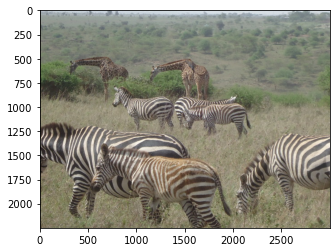

In [24]:
im = Image.open("../gzgc.coco/images/train2020/000000000561.jpg")
plt.imshow(im)

In [51]:
plt.imshow(im)

## Create list of triplets (tuples) of zebras

In [24]:
# get zebra annotations (excludes giraffe)
zebra_annotations = [ann for ann in data_train['annotations'] if ann['category_id'] == 1]
print(len(zebra_annotations)) # 6286
print(len(data_train['annotations'])) # 6925

# get the zebra names from the annotations, 6286 zebra annotations, 639 giraffe annotations
zebra_names = [ann['name'] for ann in zebra_annotations]


# get the unique individual zebra names
unique_zebra_names = np.unique(zebra_names)
print(len(unique_zebra_names))

# tuple of two np arrays, one for unique zebra names, the other for how many times that name shows up
zebra_names_counts = np.unique(zebra_names, return_counts=True)
print(type(zebra_names_counts))

6286
6925
1905
<class 'tuple'>


In [31]:
len(unique_zebra_names)

1905

In [25]:
zebra_names_twoplus = zebra_names_counts[0][np.where(zebra_names_counts[1] > 1)] # zebra with more than 1 image
print(len(zebra_names_twoplus)) # 1033

1033


In [4]:
# get counts for how many zebras have one annotation, two, etc.
annotation_counts = np.unique(np.unique(zebra_names, return_counts=True)[1], return_counts=True)

In [16]:
annotation_counts

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 24, 28], dtype=int64),
 array([872, 346, 163, 115,  80,  67,  50,  22,  25,  38,  24,  20,  18,
         17,  10,   8,   7,   6,   3,   5,   4,   3,   1,   1], dtype=int64))

In [17]:
bins = ["1","2","3-4","5-8", "9-16", "17+"]
counts = [872, 346, 278, 219, 160, 30]

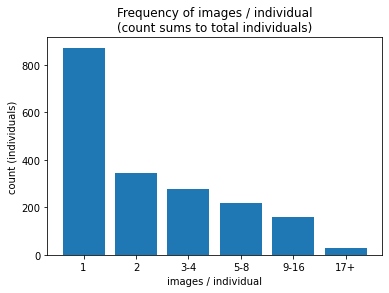

In [19]:
# plt.bar(annotation_counts[0], annotation_counts[1]);
plt.bar(bins, counts);
plt.title("Frequency of images / individual\n(count sums to total individuals)");
plt.ylabel("count (individuals)");
plt.xlabel("images / individual");
plt.savefig('log-scaled-counts-zebra-hist.jpg')

In [32]:
annotation_counts

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 24, 28], dtype=int64),
 array([872, 346, 163, 115,  80,  67,  50,  22,  25,  38,  24,  20,  18,
         17,  10,   8,   7,   6,   3,   5,   4,   3,   1,   1], dtype=int64))

In [40]:
[img['file_name'] for img in data_train['images'] if img['id'] in [4155, 4156]] 

['000000004155.jpg', '000000004156.jpg']

In [28]:
im = Image.open("../gzgc.coco/images/train2020/000000000002.jpg")

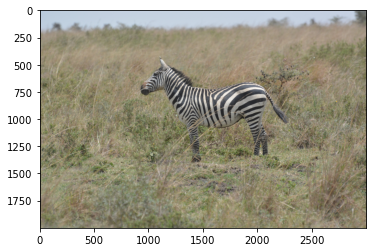

In [29]:
plt.imshow(im)

https://github.com/andreasveit/triplet-network-pytorch

https://github.com/adambielski/siamese-triplet/blob/master/datasets.py

https://medium.com/@enoshshr/triplet-loss-and-siamese-neural-networks-5d363fdeba9b

In [ ]:

def generate_triplets(dataset, label, sample_per_class=10):
  x, y = None, None
  for i in range(10):
    pos_indices = np.argwhere(label == i)[:,0]
    neg_indices = np.argwhere(label != i)[:,0]

    # print("pos indices: {}, neg_indices: {}".format(pos_indices.shape, neg_indices.shape))
    choice_anchor = np.random.choice(pos_indices.shape[0], sample_per_class, replace=False)
    choice_anchor = pos_indices[choice_anchor]

    choice_pos = np.random.choice(pos_indices.shape[0], sample_per_class, replace=False)
    choice_pos = pos_indices[choice_pos]

    choice_neg = np.random.choice(neg_indices.shape[0], sample_per_class, replace=False)
    choice_neg = neg_indices[choice_neg]

    sub_x_anc = dataset[choice_anchor]
    
    sub_x_pos = dataset[choice_pos]

    sub_x_neg = dataset[choice_neg]
      

    if(x is None):
      x = [(sub_x_anc), (sub_x_pos), (sub_x_neg)]
      y = [label[choice_anchor], label[choice_pos], label[choice_neg]]
        
    else:
      x[0] = np.vstack((x[0], (sub_x_anc)))
      x[1] = np.vstack((x[1], (sub_x_pos)))
      x[2] = np.vstack((x[2], (sub_x_neg)))

      y[0] = np.hstack((y[0].flatten(), label[choice_anchor].flatten()))
      y[1] = np.hstack((y[1].flatten(), label[choice_pos].flatten()))
      y[2] = np.hstack((y[2].flatten(), label[choice_neg].flatten()))
    
  return x, y

What I want is a list of images containing zebra pairs that are identical. Given that there's 872 pairs of zebras, let's find all these pairs and save these to a list.

In [25]:
np.unique(zebra_names, return_counts=True)

(array(['IBEIS_PZ_0001', 'IBEIS_PZ_0002', 'IBEIS_PZ_0003', ...,
        'IBEIS_PZ_1908', 'IBEIS_PZ_1909', 'IBEIS_PZ_1910'], dtype='<U13'),
 array([17,  7,  4, ...,  4, 16,  1], dtype=int64))

In [47]:
# for each zebra name here, there are only two images for that zebra
zebra_names_two = zebra_names_counts[0][np.where(zebra_names_counts[1]==2)]
zebra_names_three = zebra_names_counts[0][np.where(zebra_names_counts[1]==3)]
zebra_names_twoplus = zebra_names_counts[0][np.where(zebra_names_counts[1] > 1)] # zebra with more than 1 image

In [12]:
anchors = zebra_names_counts[0][np.where(zebra_names_counts[1] > 1)]

In [13]:
anchors

array(['IBEIS_PZ_0001', 'IBEIS_PZ_0002', 'IBEIS_PZ_0003', ...,
       'IBEIS_PZ_1907', 'IBEIS_PZ_1908', 'IBEIS_PZ_1909'], dtype='<U13')

In [4]:
anchors = zebra_names_counts[0][np.where(zebra_names_counts[1] > 1)]
rng = np.random.default_rng()

def generate_triplet():
    '''
    references data_train (json) and anchors, which needs zebra_names_counts
    '''
    anchor_zebra_name = rng.choice(anchors, replace=True)
#     print(anchor_zebra_name)
    anchor_img_ids = [ann['image_id'] for ann in data_train['annotations'] if ann['name']==anchor_zebra_name]
#     print(anchor_img_ids)
    anchor_file_names = [img['file_name'] for img in data_train['images'] if img['id'] in anchor_img_ids]
    
    anchor_path = np.random.choice(anchor_file_names, replace=False)
#     print(anchor_path)

    positive_path = anchor_path
    while positive_path == anchor_path:
        positive_path = np.random.choice(anchor_file_names, replace=False)
#     print(positive_path)

    neg_zebra_name = anchor_zebra_name
    while neg_zebra_name == anchor_zebra_name:
        neg_zebra_name = np.random.choice(unique_zebra_names, replace=False)
    
    neg_img_ids = [ann['image_id'] for ann in data_train['annotations'] if ann['name']==neg_zebra_name]
#     print(neg_img_ids)
    neg_file_names = [img['file_name'] for img in data_train['images'] if img['id'] in neg_img_ids]
#     print(neg_file_names)
    negative_path = np.random.choice(neg_file_names, replace=False)
#     print(negative_path)
    
    return (anchor_path, positive_path, negative_path)

In [5]:
triplets = []
for i in tqdm(np.arange(10000)):
    triplets.append(generate_triplet())

100%|██████████| 10000/10000 [00:50<00:00, 196.38it/s]


In [6]:
triplets = list(set(triplets))

In [7]:
print(len(triplets))

9992


In [8]:
class TripletZebras(torch.utils.data.Dataset):
    """COCO Custom Dataset compatible with torch.utils.data.DataLoader."""
    def __init__(self, root, triplets, transform=None):
        """Set the path for images and annotations.

        Args:
            root: image directory.
            json: coco annotation file path.
            transform: image transformer.
            filter_category (iterable): set of categories to include, e.g. [0, 1]
        """
        self.root = root
        self.triplets = triplets
        self.transform = transform

    def __getitem__(self, index):
        """Returns triplet of images"""
        
        anchor_path, positive_path, negative_path = self.triplets[index]
        
        img1 = Image.open(os.path.join(self.root, anchor_path)).convert('RGB')
        img2 = Image.open(os.path.join(self.root, positive_path)).convert('RGB')
        img3 = Image.open(os.path.join(self.root, negative_path)).convert('RGB')
        
        # TO DO: apply mask here
        
        if self.transform is not None:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
            img3 = self.transform(img3)

            
        # Return image and animal identifier
        return (img1, img2, img3)

    def __len__(self):
        return len(self.triplets)


In [12]:
import torch
import torch.nn.functional as F
import argparse
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

def initialize_model(use_pretrained=True, l1Units = 500, l2Units=128):

    model = torch.hub.load('pytorch/vision:v0.9.0', 'densenet201', pretrained=use_pretrained)
    for param in model.parameters():
        param.requires_grad = False  # because these layers are pretrained
    # change the final layer to be a bottle neck of two layers
    model.classifier = nn.Sequential(nn.Linear(1920, l1Units), nn.Linear(l1Units,
                                                                     l2Units))  # assuming that the fc7 layer has 512 neurons, otherwise change it
    return model

def train(args, model, device, train_loader, optimizer, epoch, triplet_loss):
    '''
    This is your training function. When you call this function, the model is
    trained for 1 epoch.
    '''
    model.train()  # Set the model to training mode
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()  # Clear the gradient
        output = model(data)  # Make predictions
        loss = F.triplet_margin_loss(anchor, positive, negative, margin=1.0, p=2)
        loss.backward()  # Gradient computation
        optimizer.step()  # Perform a single optimization step
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.sampler),
                       100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader, dataName):
    model.eval()  # Set the model to inference mode
    test_loss = 0
    correct = 0 # number of times it gets the distances correct
    test_num = 0
    with torch.no_grad():  # For the inference step, gradient is not computed
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # TO DO: function that takes output and turns into anchor, positive, negative
            test_loss += F.triplet_margin_loss(anchor, positive, negative, margin=1.0, p=2) # sum up batch loss
            # pull the predicted matches from the output
            # pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            # correct += pred.eq(target.view_as(pred)).sum().item()
            #test_num += len(data)

    #test_loss /= test_num

    # print('\n' + dataName + ' tested: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    #     test_loss, correct, test_num,
    #     100. * correct / test_num))


    return test_loss #, correct, test_num


In [ ]:
parser = argparse.ArgumentParser(description='TripNet: a network for ReID')
parser.add_argument('name',
                    help="what you want to name this model save file")
parser.add_argument('--epochs', type=int, default=14, metavar='N',
                    help='number of epochs to train (default: 14)')
parser.add_argument('--lr', type=float, default=1.0, metavar='LR',
                    help='learning rate (default: 0.001)')
parser.add_argument('--step', type=int, default=1, metavar='N',
                    help='number of epochs between learning rate reductions (default: 1)')
parser.add_argument('--gamma', type=float, default=0.7, metavar='M',
                    help='Learning rate step gamma (default: 0.7)')
parser.add_argument('--weight-decay', type=float, default=0.02, metavar='M',
                    help='Learning rate step gamma (default: 0.02)')
parser.add_argument('--seed', type=int, default=1, metavar='S',
                    help='random seed (default: 1)')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='disables CUDA training')
parser.add_argument('--load-model', type=str,
                    help='model file path or model name for plotting fract comparison')
parser.add_argument('--save-model', action='store_true', default=True,
                    help='For Saving the current Model')
args = parser.parse_args()

use_cuda = not args.no_cuda and torch.cuda.is_available()

np.random.seed(2021)  # to ensure you always get the same train/test split
torch.manual_seed(args.seed)
device = torch.device("cuda" if use_cuda else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

# dataset = ???

# object recognition, pretrained on imagenet
# https://pytorch.org/hub/pytorch_vision_densenet/
model = initialize_model(use_pretrained=True, l1Units = 500, l2Units=128)
print(model)
model = model.to(device)
# Try different optimzers here [Adam, SGD, RMSprop]
optimizer = optim.Adam(model.parameters(), lr=args.lr, weight_decay = args.weight_decay)

# Set your learning rate scheduler
scheduler = StepLR(optimizer, step_size=args.step, gamma=args.gamma)

# Training loop
trainLoss = []
valLoss = []
for epoch in range(1, args.epochs + 1):
    train(args, model, device, train_loader, optimizer, epoch)
    trloss = test(model, device, train_loader, "train data")
    vloss = test(model, device, val_loader, "val data")
    trainLoss.append(trloss)
    valLoss.append(vloss)
    scheduler.step()  # learning rate scheduler

if args.save_model:
        torch.save(model.state_dict(), args.name + "_model.pt")

# plot training and validation loss by epoch
f = plt.figure(figsize=(6, 5))
ax = plt.subplot()
plt.plot(range(1, args.epochs + 1), trainLoss, label="training loss")
plt.plot(range(1, args.epochs + 1), valLoss, label="validation loss")
ax.set_title('loss over epochs')
# plt.xlim([0, 1.1])
# plt.ylim([0, 1.1])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()



python denseNet201_firstPass.py --data-folder ../gzgc.coco/images/train2020 --train-json ../gzgc.coco/annotations/customSplit_train.json --val-json ../gzgc.coco/annotations/customSplit_val.json



python denseNet201_secondPass.py --data-folder ../gzgc.coco/images/train2020 --train-json ../gzgc.coco/annotations/customSplit_train.json --val-json ../gzgc.coco/annotations/customSplit_val.json --batch-size 16 --batch-log-interval 1

In [30]:
root = '../gzgc.coco/images/train2020'

transforms_ = transforms.Compose([
    transforms.Resize([500, 750]),
    transforms.ToTensor(),
])

zebra_triplets = TripletZebras(root=root,
    triplets=triplets,
    transform=transforms
)

train_loader = torch.utils.data.DataLoader(dataset=zebra_triplets,
            batch_size=32,
            shuffle=True,
            num_workers=4)

In [ ]:
def train(args, model, device, train_loader, optimizer, epoch):
    '''
    This is your training function. When you call this function, the model is
    trained for 1 epoch.
    '''
    model.train()  # Set the model to training mode
    for batch_idx, (img1, img2, img3) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()  # Clear the gradient
        embeddings = model(data)  # Make predictions
        loss = F.triplet_margin_loss(anchor, positive, negative, margin=1.0, p=2)  # sum up batch loss
        loss.backward()  # Gradient computation
        optimizer.step()  # Perform a single optimization step
        if batch_idx % args.batch_log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.sampler),
                       100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
for triplet in train_loader:
    print(triplet)
    break

In [ ]:
file_names = [img['file_name'] for img in self.images if img['id']==image_id]

if animal_name in self.anchors:
    print("animal in anchors")
else:
    print("animal not in anchors, no positives")
    return

anchor_path = np.random.choice(file_names, replace=False)
print(anchor_path)

positive_path = anchor_path
while positive_path == anchor_path:
    positive_path = np.random.choice(file_names, replace=False)

print(positive_path)

neg_zebra_name = animal_name
while neg_zebra_name == animal_name:
    neg_zebra_name = np.random.choice(self.zebra_names, replace=False)

neg_img_ids = [ann['image_id'] for ann in self.annotations if ann['name'] == neg_zebra_name]
neg_file_names = [img['file_name'] for img in self.images if img['id']==neg_img_ids]
negative_path = np.random.choice(neg_file_names, replace=False)

print(negative_path)

In [53]:
x_master_pos_filenames = []
x_master_pos_id = []
for name in zebra_names_twoplus:
    img_ids = [ann['image_id'] for ann in data_train['annotations'] if ann['name'] == name]
    file_names = [img['file_name'] for img in data_train['images'] if img['id'] in img_ids]
    # if we want the tensor, load the image here, and append the tensor to the list
    x_master_pos_filenames.append(file_names)
    x_master_pos_id.append(name)

python data_loader_triplet.py --images '../gzgc.coco/images/train2020' --json '../gzgc.coco/annotations/instances_train2020.json'

In [17]:
# zebra_names is list of all individual zebra names

# rng = np.random.default_rng()

# def generate_triplets(dataset, label):
#     rng.choice(label)

In [66]:
'IBEIS_PZ_0001'.split('_')[2]

'0001'

In [73]:
all_ids = [int(name.split('_')[2]) for name in zebra_names]

In [79]:
np.unique([name.split('_')[1] for name in zebra_names])

array(['PZ'], dtype='<U2')

In [75]:
len(np.unique(all_ids))

1905

In [77]:
for i in np.arange(1, 1906):
    if i not in np.unique(all_ids):
        print(i)
    

947
1898
1900
1901
1903


In [10]:
np.unique(zebra_names, return_counts=True)

(array(['IBEIS_PZ_0001', 'IBEIS_PZ_0002', 'IBEIS_PZ_0003', ...,
        'IBEIS_PZ_1908', 'IBEIS_PZ_1909', 'IBEIS_PZ_1910'], dtype='<U13'),
 array([17,  7,  4, ...,  4, 16,  1], dtype=int64))

In [ ]:
np

In [57]:
len(np.unique(zebra_names, return_counts=True)[0])

1905

In [41]:
np.histogram(np.unique(zebra_names, return_counts=True)[1])

(array([1768,  177,   77,   31,    1,    1,    0,    0,    0,    1],
       dtype=int64),
 array([ 1. ,  6.3, 11.6, 16.9, 22.2, 27.5, 32.8, 38.1, 43.4, 48.7, 54. ]))

(array([1.218e+03, 1.630e+02, 1.150e+02, 8.000e+01, 6.700e+01, 5.000e+01,
        2.200e+01, 2.500e+01, 3.800e+01, 2.400e+01, 2.000e+01, 1.800e+01,
        2.700e+01, 8.000e+00, 7.000e+00, 6.000e+00, 3.000e+00, 5.000e+00,
        4.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 1.  ,  2.08,  3.16,  4.24,  5.32,  6.4 ,  7.48,  8.56,  9.64,
        10.72, 11.8 , 12.88, 13.96, 15.04, 16.12, 17.2 , 18.28, 19.36,
        20.44, 21.52, 22.6 , 23.68, 24.76, 25.84, 26.92, 28.  ]),
 <BarContainer object of 25 artists>)

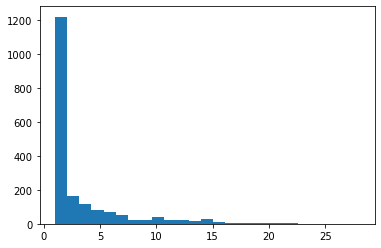

In [54]:
plt.hist(np.unique(zebra_names, return_counts=True)[1])

In [55]:
np.unique(zebra_names, return_counts=True)[1]

array([17,  7,  4, ...,  4, 16,  1], dtype=int64)

In [ ]:
np.unique(zebra_names, return_counts=True)[1]

In [5]:
# load the annotations
with open('../gzgc.coco/annotations/instances_train2020_maskrcnn.json') as f:
  data_train = json.load(f)
f.close()

In [3]:
im = Image.open("../gzgc.coco/images/train2020/000000000002.jpg")

In [7]:
# COCO Python API
sys.path.append('C:\\Users\\kmei\Downloads/cocoapi/PythonAPI/pycocotools')
from pycocotools import mask

In [ ]:
test = mask.decode(data_train['annotations'][1]['maskrcnn_mask_rle'])

In [3]:
data_train['annotations'][1]['maskrcnn_mask_rle']

{'size': [2000, 3000],
 'counts': 'YYah18Rn1?B>B>B9H6J6J6M2N3M2M3N3M2N2N2N2O1N2N2N2O1N1O1O10O01O1O1O1O10O01N2O1O1O1O1N101N2O1N2N2N2N2O0O2O1N2O1N2O1O1N2O1O001O1O1O1O1O1O1O1O1O1O00100O1O1O10O01O1O001O1O001O1O001O1O001O001N2O001N101O1N1O2O0O2O0O2O00001O001O001O01O01O00010O010O010O010O10O0100O00100O00100O1O001O1O001O1O1O0O2O1N2O0@a0]Oc0F:F9G:J6O1N2O001N2O1O001O1O1O1O001O100O1O001000001O0000000000001N1000000000001O00000000001N10000000001O000000001O00000O101O0000001O0000001O00010O100O100O100O100O2O1O1N2O1O2M2O2N2N2N2N2M4M3M4L3N3L3M3M3M2O1N001O000O100000O10O1000O0100O010O10O010O10O1000O010000O1000000000001O0010O04L5L4K5K5L4K2N001O001O0O1000000O10000O100O010O10O0100O010O010O10O0100O10000O01001N10001O2N2N2N3M3M2N3N3L3M1O1N2O001O000O100O10000O100O100O010O1O010O10O01O010O10O0100O010O100O100O10002N1N3N1O2N2N1O2N2N2N2N2N2O0O001O001O00000O10000O10000O010O1000O0100O010O10O010000O100000000O10002N2O1N2N3M3N2N2N3M5J=D<Ch0YO`0_O8I7H7I6J5K5K4L5K4L3M3M2N2N2N1N3N2N1O1N2O1O2N1N2O4L5K5K5K6J6I7J7I6J7I4K2O1O001

In [4]:
file_names = [img['file_name'] for img in data_train['images']]

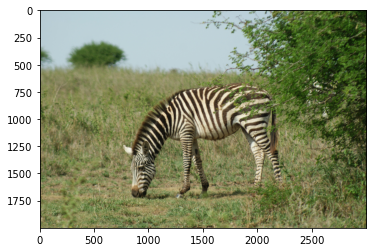

In [7]:
im = Image.open("../gzgc.coco/images/train2020/000000000072.jpg")
plt.imshow(im)

In [9]:
[img['id'] for img in data_train['images'] if img['file_name'] == '000000000072.jpg']

[72]

In [11]:
[ann['id'] for ann in data_train['annotations'] if ann['image_id']==72]

[74]

In [ ]:
data_train

In [173]:
# Define transforms

image_size = 224
# torchvision pretrained models tend to use 224x224 images
downsample = torchvision.transforms.Compose([
    torchvision.transforms.Resize(image_size),
    # Assume that zebra is centered
    torchvision.transforms.CenterCrop(image_size),
])

augment1 = torchvision.transforms.RandomChoice(
[torchvision.transforms.RandomAffine(degrees=10, translate=(0.05,0.05), shear=10), 
 torchvision.transforms.ColorJitter(brightness=(1,1), contrast=(1,1), saturation=(1,1), hue=(-0.1,0.1)),
 torchvision.transforms.RandomPerspective(distortion_scale=0.20, p=1),
 torchvision.transforms.GaussianBlur(5, sigma=(0.1, 1.5))]
)

# Pretrained torchvision models need specific normalization;
# see https://pytorch.org/vision/stable/models.html
normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])

augment2 = torchvision.transforms.RandomErasing(p=0.5, scale=(0.02, 0.10), ratio=(0.3, 3.3), value=0, inplace=False)

transforms = torchvision.transforms.Compose([
    downsample,
    augment1,
    torchvision.transforms.ToTensor(),
    normalize,
    augment2,
])


In [ ]:
plt.imshow(im)

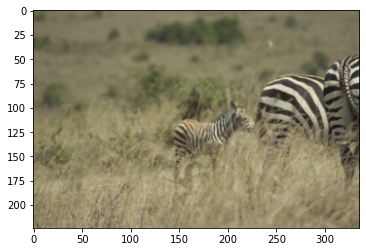

In [34]:
plt.imshow(torchvision.transforms.Resize(image_size)(im))

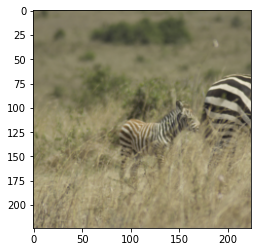

In [35]:
plt.imshow(downsample(im))

In [148]:
augment_test = torchvision.transforms.RandomChoice(
 [
torchvision.transforms.RandomAffine(degrees=10, translate=(0.05,0.05), shear=10), 
 torchvision.transforms.ColorJitter(brightness=(1,1), contrast=(1,1), saturation=(1,1), hue=(-0.1,0.1)),
 torchvision.transforms.RandomPerspective(distortion_scale=0.20, p=1),
 torchvision.transforms.GaussianBlur(5, sigma=(0.1, 1.5))
]
)

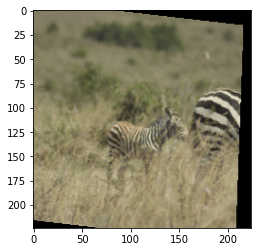

In [154]:
im = Image.open("../gzgc.coco/images/train2020/000000000302.jpg")
plt.imshow(augment_test(downsample(im)))

In [174]:
normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])

transforms_test = torchvision.transforms.Compose([
    downsample,
    augment1,
    torchvision.transforms.ToTensor(),
    normalize,
    augment2,
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


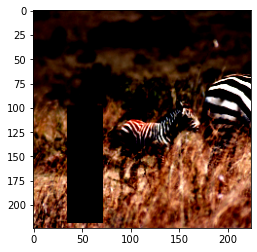

In [177]:
plt.imshow(transforms_test(im).permute(1, 2, 0))

In [171]:
augment1 = torchvision.transforms.RandomChoice(
    [torchvision.transforms.RandomAffine(degrees=10, translate=(0.05,0.05), shear=10), 
     torchvision.transforms.ColorJitter(brightness=(10,10), contrast=(10,10), saturation=(10,10), hue=(10,10)),
     torchvision.transforms.RandomPerspective(distortion_scale=0.25, p=1),
     torchvision.transforms.GaussianBlur(5, sigma=(0.1, 1.5))]
)



ValueError: hue values should be between (-0.5, 0.5)

In [42]:
train_trip_err = [2381, 2352, 2344, 1478, 1356, 1353] # 9991
val_trip_err = [374, 340, 323, 350, 298, 266] # 1491
test_trip_err = [723, 652, 579, 602, 563, 494] # 2993
models = ['im_DataAug', 'seg_DataAug', 'bb_DataAug', 'im_noAug', 'seg_noAug', 'bb_noAug']


In [64]:
# train_trip_err_per = [x / 9991 for x in train_trip_err]
# val_trip_err_per = [x / 1491 for x in val_trip_err]
# test_trip_err_per = [x / 2993 for x in test_trip_err]

train_trip_err_per = [(x / 9991)*100 for x in train_trip_err]
val_trip_err_per = [(x / 1491)*100 for x in val_trip_err]
test_trip_err_per = [(x / 2993)*100 for x in test_trip_err]

In [45]:
train_trip_err_per

[0.23831448303473127,
 0.23541187068361524,
 0.23461115003503152,
 0.14793313982584325,
 0.13572214993494144,
 0.13542187969172256]

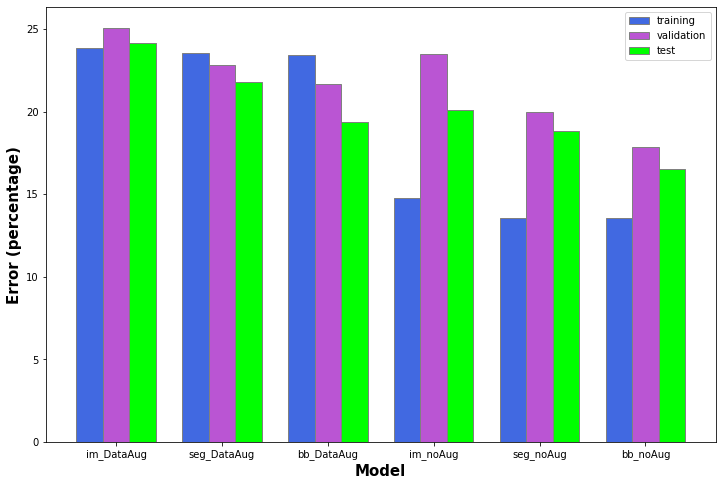

In [65]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(models))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, train_trip_err_per, color ='royalblue', width = barWidth,
        edgecolor ='grey', label ='training')
plt.bar(br2, val_trip_err_per, color ='mediumorchid', width = barWidth,
        edgecolor ='grey', label ='validation')
plt.bar(br3, test_trip_err_per, color ='lime', width = barWidth,
        edgecolor ='grey', label ='test')
 
# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Error (percentage)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(models))],
        models)
 
plt.legend()
plt.savefig('triplet_errors_per.jpg')
plt.show()